# ECSE552 - W23 - Homework 2
Released: 10 February 2023 @ 13:00

Due: 23 February 2023 @ 23:59

Last Modified: 10 February 2023

For questions regarding this assignment, please contact:
- Part 1 & 2: joseph.szymborski@mail.mcgill.ca
- Part 3: amin.emad@mcgill.ca

## Part 1 - Data Augmentation (36 pts)

---



In Tutorial 4, a Twin neural network architecture was used to test if two images matched.

Data Augementation is a method by which data inputted to a model is altered in ways that *don't change the label* of the category so that the model might *learn from more diverse samples*. This is often done to avoid overfitting and creating fragile models.

PyTorch offers a simple way to apply transformations to [`torchvision`](https://pytorch.org/vision/0.8/) datasets using the `transform` argument of datasets in the [`torchvision.datasets`](https://pytorch.org/vision/0.8/datasets.html) module. An example of this is available in Tutorial 3.

You are tasked with the following:


### Q1.1: Choosing Transformations (9 pts)

Please **list at least 3 transformations** that would be applicable to the Twin neural network *as applied to the digit matching task* from Tutorial 3.

Please also give a **very brief (~1-2 sentence) explanation** as to what sort of variance each transformation will introduce to the data, and why that might be favorable.

Assure that at least one of the listed transformations are implemented by the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) [API](https://www.howtogeek.com/343877/what-is-an-api/). You can do this by simply reading function names and descriptions there and cross-referencing with your list. 


1. Transformation 1 Random Rotation: This transformation rotates the image by the specified angle. This can help the model learn a more robust representation of the digits and identify them even when they are slightly tilted.

2. Transformation 2 Horizontal and Vertical Translation: This transformation moves all pixels of an image in one direction, either horizontally or vertically while keeping the image dimensions invariant. This helps create a larger training dataset with plausible examples, e.g. objects in the image are not perfectly aligned in the center of the image, which will help the model to learn to be invariant to shifts and ultimately generalize better.

3. Transformation 3 Gaussian Blur: This transformation randomly blurs images by using a Gaussian distribution. This helps our deep learning model be more robust, prevents overfitting to high frequency features by distorting them and teach the model to not rely on specific features.


### Q1.2 Implementing Custom Transformations (17 pts)

It would be helpful to add pixel-level noise to the digit samples, but the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) API does not have such a transform.

**Implement your own noise transform using the template code below.**

#### Hints

You can add random noise however you like, but assure that letters in the images are still legible (*i.e.:* the signal-to-noise ratio is still high). You can eye-ball it, just use a small conservatively small value if you are concerned.

Below are some images of how your noise might look. In this example, the amount of noise is added with a random probability, and the amount of noise added is capped at some level to assure legibility.

(You can alternatively add random noise with consistant probability)

![Noise applied to the USPS digits set](https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/W23/H2/usps_noise.webp)

![Noise applied to the MNIST digits set](https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/W23/H2/mnist_noise.webp)

In [1]:
# Q1.2 code here
class AddNoise(object):
    def __init__(self,mean=0,std=1):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        # this function is called on each transform
        # the tensor parameter is the sample to be transformed
        # `tensor` is a matrix which represents the image with values from 0-1
        # Your task is to add random values to `tensor`. 
        # Hint: Generate a random matrix with the same size as `tensor` and add
        # it to `tensor`

        # you can use properties of your object you defined in __init__
        # assert self.mean == 0
        # assert self.std == 1
        
        # this transform doesn't do anything other but output what is inputted

        n = torch.randn(tensor.size()) * self.std + self.mean # generate noise
        tensor = tensor + n # add noise
        return tensor
    
    def __repr__(self):
        # you can ignore this if you like
        # return here a string representation of your transform
        # you can include parameters in it should you like
        # this one just returns the class name
        return self.__class__.__name__ + '()'

### Q1.3 Applying the Transformations (5 pts)

**Define an instance of [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)** for both the USPS and MNIST datasets, much like was done in Tutorial 4. You may reuse the code from there.

Just like in Tutorial 3, name those instances of Dataset: `usps_trainset`, `usps_testset`, `mnist_trainset`, `mnist_testset` according to whether they belong to MNIST or USPS, and if they are training or test splits.

Also, just like in Tutorial 3, name a variable `transform` and use [`torchvision.transforms.Compose`](https://pytorch.org/vision/0.8/transforms.html#torchvision.transforms.Compose) to **compose the following transformations:**

1. At least one transformation you listed in Q1.1
2. The AddNoise transformation from Q1.2

**Apply the transformations to all four Datasets** (*i.e.*: the Datasets for `usps_trainset`, `usps_testset`, `mnist_trainset`, `mnist_testset`).

Take particular care that the transformations you are choosing are applicable to the task of matching digits. For example, a transformation that would randomly add black boxes to the images might cover the lower half of a 3, which would make it ambiguosly a 2 or a 3.



In [2]:
# Q1.3 code here

# import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(30),
    AddNoise(mean=0,std=0.1)
])


In [4]:
# load dataset for mnist
mnist_trainset = torchvision.datasets.MNIST(root='./mnistdata', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./mnistdata', train=False, download=True, transform=transform)

# load dataset for usps
usps_trainset = torchvision.datasets.USPS(root='./uspsdata', train=True, download=True, transform=transform)
usps_testset = torchvision.datasets.USPS(root='./uspsdata', train=False, download=True, transform=transform)

### Q1.4 Visualising the Tranformations (5 pts)

From your newly augmented datasets, **plot 3 images from the MNIST and USPS** (for a total of 6 images) along with the digit number (*e.g.:* in the plot title, as done in Tutorial 4).

You can certainly recycle code from Tutorial 4.

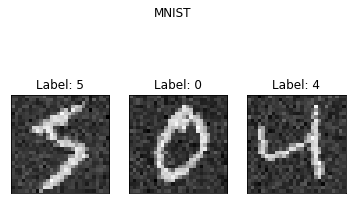

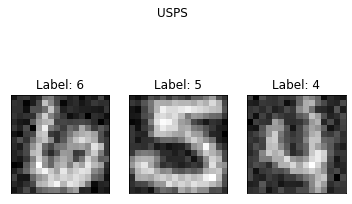

In [5]:
# Q1.4 code here
# function to plot images and labels from MNIST and USPS datasets for Q1.4
def plot_images(images, labels, title):
    fig, axes = plt.subplots(1, 3, figsize=(6, 4))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
        ax.set_xticks([])
        ax.set_yticks([])
    fig.suptitle(title)
    plt.show()

# plot 3 images from MNIST
mnist_images, mnist_labels = zip(*[mnist_trainset[i] for i in range(3)])
plot_images(mnist_images, mnist_labels, 'MNIST')

# plot 3 images from USPS
usps_images, usps_labels = zip(*[usps_trainset[i] for i in range(3)])
plot_images(usps_images, usps_labels, 'USPS')


## Part 2 - Dropout (14 pts)


---


### Q2.1 Illustrating Dropout (5 pts)

Prepare 1000 samples of size 120 (*i.e.:* $x = \mathbb{R}^{1000\times 120}$). Values can be randomly sampled or all ones; just so long as they are non-zero.

Apply a "dropout" with a 25% chance of zeroing out an input value to your random sample using [`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout).

Finally, calculate the average percentage of elements that are equal to zero in each sample and confirm that it is approximately 25%.



In [6]:
# # Q2.1 code here

sample = torch.ones(1000, 120) # 1000 samples of size 120
dropout = torch.nn.Dropout(p=0.25, inplace=True) # p is the probability of an element to be zeroed
dropout(sample) # apply dropout to sample

# calculate the average percentage of elements that are equal to zero in each sample
print('Average percentage of elements that are equal to zero in each sample: {:.2f}%'.format(100 * torch.mean(torch.sum(sample == 0, dim=1) / sample.size(1))))

# we can see that the average percentage of elements that are equal to zero in each sample is 25% and hence the dropout is working as expected.




Average percentage of elements that are equal to zero in each sample: 25.00%


### Q2.2 Train with Dropout and Data Augmentation (9 pts)

Change the code below to include at least one Dropout with $p=0.1$.

Add as many dropout layers as you see fit between layers that are, in your estimation, the most relevant.

Then, use the cell after the next one to run your dropout network and a network without dropout. The cell after that will plot out the Loss and AUC for both models.

*N.B.*: Don't overthink the number of dropout layers or their placement. There is more than one correct answer and we're primarily looking an understanding of the purpose of including dropout layers and how it's acheived (*i.e.*: to combat overfitting from overparameterization by zeroing out random elements of the output of layers with many parameters).

In [19]:
# This is the neural network architecture
# ** This is the code cell you are meant edit to add dropout **
# More specifically, the `__init__` and `forward` methods

# uncomment the following line if you are using own laptop
# !pip install pytorch-lightning 
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
import sklearn.metrics as metrics

class MatchingNetworkWithDropout(pl.LightningModule):
    def __init__(self, mnist_in, usps_in):
        # (Optionally) EDIT ME 
        super(MatchingNetworkWithDropout, self).__init__()
        self.layer1_mnist = nn.Linear(mnist_in, 128)
        self.layer1_usps = nn.Linear(usps_in, 128)
        
        self.layer2 = nn.Linear(128, 64) # shared between the mnist and usps track
        self.layer3 = nn.Linear(64, 32) # shared between the mnist and usps track

        self.dropout = nn.Dropout(p=0.1)
        
        self.loss_func = nn.CosineEmbeddingLoss(reduction='sum')

    def forward(self, x1, x2):
        x1 = F.relu(self.layer1_mnist(x1))
        x1 = self.dropout(x1)
        x1 = F.relu(self.layer2(x1))
        x1 = torch.tanh(self.layer3(x1))
        
        x2 = F.relu(self.layer1_usps(x2))
        x2 = self.dropout(x2)
        x2 = F.relu(self.layer2(x2))
        x2 = torch.tanh(self.layer3(x2))
        return x1, x2

    def step(self, batch, batch_idx, log_prefix):
      
      (mnist_data, usps_data), (mnist_y, usps_y) = batch
      mnist_data = mnist_data.flatten(start_dim=1)
      usps_data = usps_data.flatten(start_dim=1)
      mnist_embedding, usps_embedding = self(mnist_data, usps_data)

      y = (mnist_y == usps_y) * 2 - 1

      loss = self.loss_func(mnist_embedding, usps_embedding, y)

      self.log(log_prefix + "loss", loss, on_step=False, on_epoch=True)

      y_hat = torch.round(F.cosine_similarity(mnist_embedding, usps_embedding))

      fpr, tpr, thresholds = metrics.roc_curve(y.cpu(), y_hat.cpu().detach().reshape(-1))
      auc = metrics.auc(fpr, tpr)

      self.log(log_prefix + "auc", auc, on_step=False, on_epoch=True, prog_bar=True)
      
      return loss

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'training_')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val_')

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=1e-3)

In [20]:
from torch.utils.data import Dataset


class MatchingNetworkNoDropout(pl.LightningModule):
    def __init__(self, mnist_in, usps_in):
        super(MatchingNetworkNoDropout, self).__init__()
        self.layer1_mnist = nn.Linear(mnist_in, 128)
        self.layer1_usps = nn.Linear(usps_in, 128)
        
        self.layer2 = nn.Linear(128, 64) # shared between the mnist and usps track
        self.layer3 = nn.Linear(64, 32) # shared between the mnist and usps track
        
        self.loss_func = nn.CosineEmbeddingLoss(reduction='sum')
    
    def forward(self, x1, x2):
        x1 = F.relu(self.layer1_mnist(x1))
        x1 = F.relu(self.layer2(x1))
        x1 = torch.tanh(self.layer3(x1))
        
        x2 = F.relu(self.layer1_usps(x2))
        x2 = F.relu(self.layer2(x2))
        x2 = torch.tanh(self.layer3(x2))
        return x1, x2


    def step(self, batch, batch_idx, log_prefix):
      (mnist_data, usps_data), (mnist_y, usps_y) = batch
      mnist_data = mnist_data.flatten(start_dim=1)
      usps_data = usps_data.flatten(start_dim=1)
      mnist_embedding, usps_embedding = self(mnist_data, usps_data)

      y = (mnist_y == usps_y) * 2 - 1

      loss = self.loss_func(mnist_embedding, usps_embedding, y)

      self.log(log_prefix + "loss", loss, on_step=False, on_epoch=True)

      y_hat = torch.round(F.cosine_similarity(mnist_embedding, usps_embedding))

      fpr, tpr, thresholds = metrics.roc_curve(y.cpu(), y_hat.cpu().detach().reshape(-1))
      auc = metrics.auc(fpr, tpr)

      self.log(log_prefix + "auc", auc, on_step=False, on_epoch=True, prog_bar=True)
      
      return loss

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'training_')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val_')

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=1e-3)

class PairedDataset(Dataset):

  def __init__(self, mnist_dataset, usps_dataset):
    self.mnist_dataset = mnist_dataset
    self.usps_dataset = usps_dataset


  def __len__(self):
    return min(len(self.mnist_dataset), len(self.usps_dataset))

  def __getitem__(self, idx):
    
    mnist_data, mnist_y = self.mnist_dataset[idx]
    usps_data, usps_y = self.usps_dataset[idx]

    return (mnist_data, usps_data), (mnist_y, usps_y)


pdset_train = PairedDataset(mnist_trainset, usps_trainset)
pdset_train_loader = torch.utils.data.DataLoader(pdset_train, batch_size=128)

pdset_test = PairedDataset(mnist_testset, usps_testset)
pdset_test_loader = torch.utils.data.DataLoader(pdset_test, batch_size=128)

# !curl -O https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/T4/dict_logger.py
from dict_logger import DictLogger

model_dropout = MatchingNetworkWithDropout(28*28, 16*16)
model_no_dropout = MatchingNetworkNoDropout(28*28, 16*16)

logger_dropout = DictLogger()
logger_no_dropout = DictLogger()

num_epochs = 200

trainer = pl.Trainer(max_epochs=num_epochs,
                     gpus=1, 
                     progress_bar_refresh_rate=30,
                     logger=logger_dropout
                     )

trainer.fit(model_dropout, pdset_train_loader, pdset_test_loader)

trainer = pl.Trainer(max_epochs=num_epochs,
                     gpus=1, 
                     progress_bar_refresh_rate=30,
                     logger=logger_no_dropout
                     )

trainer.fit(model_no_dropout, pdset_train_loader, pdset_test_loader)

/home/gauri/Trustworthy/fairness/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=30)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                | Params
-----------------------------------------------------
0 | layer1_mnist | Linear              | 100 K 
1 | layer1_usps  | Linear              | 32.9 K
2 | layer2       | Linear              | 8.3 K 
3 | layer3       | L

Validation sanity check: 0it [00:00, ?it/s]

/home/gauri/Trustworthy/fairness/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/home/gauri/Trustworthy/fairness/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/home/gauri/Trustworthy/fairness/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=30)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                | Params
-----------------------------------------------------
0 | layer1_mnist | Linear              | 100 K 
1 | layer1_usps  | Linear              | 32.9 K
2 | layer2       | Linear              | 8.3 K 
3 | layer3       | L

Validation sanity check: 0it [00:00, ?it/s]

/home/gauri/Trustworthy/fairness/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/home/gauri/Trustworthy/fairness/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [15]:
# save outputs to json file for easy plotting

logger_dropout.metrics['training_loss'] = logger_dropout.metrics['training_loss'][:num_epochs]
logger_dropout.metrics['val_loss'] = logger_dropout.metrics['val_loss'][:num_epochs]
logger_dropout.metrics['training_auc'] = logger_dropout.metrics['training_auc'][:num_epochs]
logger_dropout.metrics['val_auc'] = logger_dropout.metrics['val_auc'][:num_epochs]

logger_no_dropout.metrics['training_loss'] = logger_no_dropout.metrics['training_loss'][:num_epochs]
logger_no_dropout.metrics['val_loss'] = logger_no_dropout.metrics['val_loss'][:num_epochs]
logger_no_dropout.metrics['training_auc'] = logger_no_dropout.metrics['training_auc'][:num_epochs]
logger_no_dropout.metrics['val_auc'] = logger_no_dropout.metrics['val_auc'][:num_epochs]    

In [2]:
import json

# with open('dropout.json', 'w') as f:
#     json.dump(logger_dropout.metrics, f)

# with open('no_dropout.json', 'w') as f:
#     json.dump(logger_no_dropout.metrics, f)

In [8]:
# load from text file
with open('dropout.json', 'r') as f:
    dropout_metrics = json.load(f)

with open('no_dropout.json', 'r') as f:
    no_dropout_metrics = json.load(f)

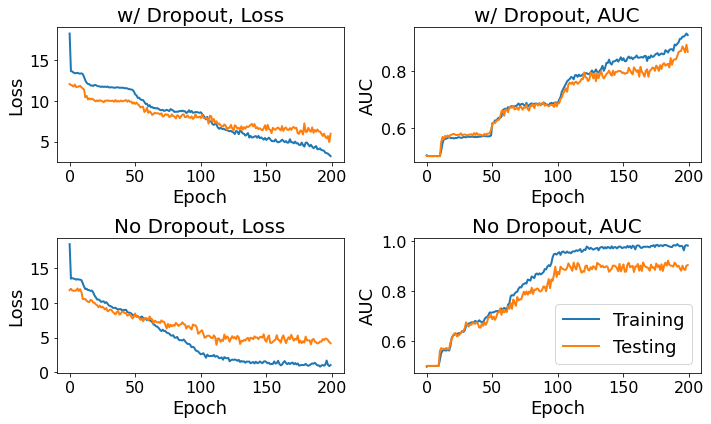

In [14]:
# This cell plots the Loss and AUC of the models with and without dropout
num_epochs = 200
parameters = {'axes.labelsize': 18, 'legend.fontsize': 18, 'xtick.labelsize':16,
              'ytick.labelsize':16, 'axes.titlesize': 20}
plt.rcParams.update(parameters)

fig, axs = plt.subplots(2,2, figsize=(10, 6))

axs[0,0].plot(range(num_epochs), dropout_metrics['training_loss'], lw=2, label='Training')
axs[0,0].plot(range(num_epochs), dropout_metrics['val_loss'], lw=2, label='Testing')
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title('w/ Dropout, Loss')

axs[0,1].plot(range(num_epochs), dropout_metrics['training_auc'], lw=2, label='Training')
axs[0,1].plot(range(num_epochs), dropout_metrics['val_auc'], lw=2, label='Testing')
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('AUC')
axs[0,1].set_title('w/ Dropout, AUC')

axs[1,0].plot(range(num_epochs), no_dropout_metrics['training_loss'], lw=2, label='Training')
axs[1,0].plot(range(num_epochs), no_dropout_metrics['val_loss'], lw=2, label='Testing')
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('No Dropout, Loss')

axs[1,1].plot(range(num_epochs), no_dropout_metrics['training_auc'], lw=2, label='Training')
axs[1,1].plot(range(num_epochs), no_dropout_metrics['val_auc'], lw=2, label='Testing')
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('AUC')
axs[1,1].set_title('No Dropout, AUC')

plt.legend()
plt.tight_layout()
plt.show()

## Part 3 - Theoretical Questions (50 pts)

### Question 3.1 (25 pts)

In the class we saw that using quadratic approximation of cost function in the neighborhood of unregularized cost function ($w^*$), the solution of the L2 regularized cost (assuming that there are no biases) is equal to

$$
\tilde{w} = \left(Q\Lambda Q^\textrm{T} + \alpha I\right)^{-1}Q\Lambda Q^\textrm{T}w^*
$$

$$
= \left[Q(\Lambda + \alpha I)Q^\textrm{T}\right]Q\Lambda Q^\textrm{T}w^*
$$

$$
= Q(\Lambda + \alpha I)^{-1} \Lambda Q^\textrm{T}w^*
$$

In these equations, $Q$ is the orthonormal matrix of eigenvector of the Hessian matrix $H$ of $J$ with respect to parameters $w$ evaluated at $w^*$ and $\Lambda$ is the diagonal matrix of its eigenvalues. Using a similar approximation, we want to evaluate under which condition early stopping and L2 regularization are equivalent.

Assume that we initialized the weights from origin and the learning rate $\epsilon$ is small enough such that $|1-\epsilon\lambda_i|<1$. Obtain an expression for $w^t$, the vector of parameters after $t$ iterations using gradient descent as a function of $H, w^*, \Lambda$ and $\epsilon$ (the learning rate). Hint: start by describing $w^t$ as a function of $w^{t-1}$ and solve this recursive formula based on the initial vector of weights. 

**Make sure that you clearly explain and justify each step (only writing down the final results is not sufficient).**

Now, compare the expression obtained for $w^t$ with the solution of the weights for L2 regularization in the equation above and find conditions (based on eigenvalues, coefficient of L2 regularization and the learning rate) that if satisfied make the two regularization methods equivalent.

### Question 3.2 (25 pts)

In the class, we saw the algorithm below and we showed how the first few equations are obtained. For the remaining equations (namely $\nabla_{\mathbf{W}^{(k)}}J$ and $\nabla_{\mathbf{h}^{(k-1)}}J$), mathematically show how the equalities are obtained. This could be done by a combination of missing equations and explanation in words.

It is important to note a few things:

1. In class, for a scalar $y$ and a matrix $\mathbf{X}$ of size $p \times q$, we defined $\frac{\partial y}{\partial \mathbf{X}}$ to be a matrix of size $q \times p$ (Lecture 5, slide 6). In the notation used in the algorithm below, note that $\nabla_{_\mathbf{X}}y = \left(\frac{\partial y}{\partial \mathbf{X}}\right)^T$. In other words, the size of $\nabla_{_\mathbf{X}}y$ and matrix $\mathbf{X}$ are equal.

2. Also, a similar notational consideration is necessary for chain rule. In class, we discussed chain rule for a scalar $z$ and vectors $\mathbf{x},\mathbf{y}$ as $\nabla_{\mathbf{x}}z=\left(\frac{\partial \mathbf{y}}{\partial \mathbf{x}}\right)^T \nabla_{\mathbf{y}}z$. Equivalently, we can write $\frac{\partial {z}}{\partial \mathbf{x}}=\frac{\partial {z}}{\partial \mathbf{y}}\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$, since $(\frac{\partial {z}}{\partial \mathbf{x}})^T=\nabla_{\mathbf{x}}z$.

3. Make sure you keep track of size of matrices and vectors. For example, if you fix a layer k, then you can consider $\mathbf{W}^{(k)}$ to be $m\times n$. This implies that $\mathbf{a}^{(k)}, \mathbf{b}^{(k)}, \mathbf{h}^{(k)}$ are all of length $m$, but $\mathbf{h}^{(k-1)}$ is of length $n$ (according to definitions of the forward prop slide, Lecture 5, slide 4).


![Algorithm](https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/W23/H2/algo.webp)